<a href="https://colab.research.google.com/github/eloiza-dias/artigo_imagens_microsc/blob/main/3_Redes_neurais_huh7_menor_erro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linhagem HUH7

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install util-gfsilveira

# Importações estruturação dos dados

In [ ]:
#organização dos arquivos
import os
#salvar/carregar arquivos em diferentes formatos
import joblib
#organizando os arquivos de forma aleatória
import random
#gerar gráfico
import matplotlib
#estruturação dos dados
import numpy as np
#gerar gráfico
import seaborn as sns
#gerar gráfico
import matplotlib.pyplot as plt
#gerar imagem
import matplotlib.image as mpimg

# Importação do modelo de CNN

In [ ]:
#modelo de revisão redes neurais - cnn
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
#from keras.utils import to_categorical
from util import meus_uteis, timeProcess, mask_corr_graphic, printLis
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

Os documentos de diferentes arquivos serão armazenados nesse diretório

In [ ]:
diretorio = '/content/drive/MyDrive/1_Informações_scripts' #alimentando a variável com os arquivos da pasta datasets
lista_dados = os.listdir(diretorio) #listando os arquivos dessa pasta
printLis(lista_dados) #printando as diferentes listas

-------------
-=< Lista >=-
-------------
0 -> lista_img_camp_clar_100_resized_regressao_3T3_samehuh72021-10-25.gz
1 -> lista_rotulo_camp_clar_100_resized_regressao_3T3_samehuh72021-10-25.gz
2 -> lista_img_camp_clar_100_resized_regressao_A549_samehuh72021-10-25.gz
3 -> lista_rotulo_camp_clar_100_resized_regressao_A549_samehuh72021-10-25.gz
4 -> lista_img_camp_clar_100_resized_regressao_huh7_samehuh72021-10-25.gz
5 -> lista_rotulo_camp_clar_100_resized_regressao_huh7_samehuh72021-10-25.gz
6 -> model_A549_samehuh7_img2021-10-26.h5
7 -> model_huh7_samehuh7_img2021-10-26.h5
8 -> model__3T3_samehuh7_img2021-10-26.h5
9 -> model_A549_samehuh7_img_40_602021-10-27.h5
10 -> model_huh7_samehuh7_img_40_602021-10-27.h5
11 -> model__3T3_samehuh7_img_40_602021-10-27.h5
12 -> lista_img_camp_clar_100_resized_regressao_A5492021-11-9.gz
13 -> lista_rotulo_camp_clar_100_resized_regressao_A5492021-11-9.gz
14 -> lista_img_camp_clar_75_resized_regressao_A5492021-11-9.gz
15 -> lista_rotulo_camp_clar_75_resize

Para regressão, foi salvo 284 imagens a partir de 71 imagens originais

In [ ]:
# #lista- soma de 284 imagens
# imagem_camp_claro = joblib.load(diretorio + '/' + lista_dados[4]) #carregando o arquivo
# imagem_camp_claro.shape #apresentando 4000 imagens de 108x108, 3 rgb

In [ ]:
#lstando arquivos com as imagens 100%, 75%, 50%, 25%
for k, v in enumerate(lista_dados):
    if k in [20,22,24,27]:
        print(f'{k} -> {v}')

20 -> lista_img_camp_clar_100_resized_regressao_huh72021-11-9.gz
22 -> lista_img_camp_clar_75_resized_regressao_HUH72021-11-9.gz
24 -> lista_img_camp_clar_50_resized_regressao_HUH72021-11-9.gz
27 -> lista_img_camp_clar_25_resized_regressao_HUH72021-11-9.gz


## x = características/imagens

In [ ]:
#somando todas as imagens de diferentes tamanho
X_cem = joblib.load(diretorio+ '/' + lista_dados[20])

# 12 -> 00-lista_img_dapi_crop_75_resized_2021-5-12.gz
X_setcin = joblib.load(diretorio+ '/' + lista_dados[22])

# 10 -> 00-lista_img_dapi_crop_50_resized_2021-5-12.gz
X_cinq = joblib.load(diretorio+ '/' + lista_dados[24])

# 8 -> 00-lista_img_dapi_crop_25_resized_2021-5-12.gz
X_vincin = joblib.load(diretorio+ '/' + lista_dados[27])

x = np.asarray(list(X_cem) + list(X_setcin) + list(X_cinq) + list(X_vincin))

x.shape

(704, 200, 200, 3)

In [ ]:
# #somando cada lista gerada acima e salvando em um array
# x = np.asarray(imagem_camp_claro) #abriando em array as imagens
# x.shape #x - características (labels) 

In [ ]:
#joblib.dump(x, '/content/drive/MyDrive/1_Informações_scripts//images_de_x_caracteristicas_Huh7.gz')

Vamos definir nossos rótulos (y)

## y = rótulos

Abrindo os rótulos que foram salvos na preparação das imagens

In [ ]:
for k, v in enumerate(lista_dados):
    if k in [21,23,25,26]:
        print(f'{k} -> {v}')

21 -> lista_rotulo_camp_clar_100_resized_regressao_huh72021-11-9.gz
23 -> lista_rotulo_camp_clar_75_resized_regressao_HUH72021-11-9.gz
25 -> lista_rotulo_camp_clar_50_resized_regressao_HUH72021-11-9.gz
26 -> lista_rotulo_camp_clar_25_resized_regressao_HUH72021-11-9.gz


In [ ]:
#somando todos os rótulos de diferentes tamanho
y_cem = joblib.load(diretorio+ '/' + lista_dados[21])

# 12 -> 00-lista_img_dapi_crop_75_resized_2021-5-12.gz
y_setcin = joblib.load(diretorio+ '/' + lista_dados[23])

# 10 -> 00-lista_img_dapi_crop_50_resized_2021-5-12.gz
y_cinq = joblib.load(diretorio+ '/' + lista_dados[25])

# 8 -> 00-lista_img_dapi_crop_25_resized_2021-5-12.gz
y_vincin = joblib.load(diretorio+ '/' + lista_dados[26])

y = np.asarray(list(y_cem) + list(y_setcin) + list(y_cinq) + list(y_vincin))

y.shape

(704,)

In [ ]:
# y_rotulo = joblib.load(diretorio + '/' + lista_dados[5]) #carregando os rotulos
# y = np.asarray(y_rotulo)
# y.shape

In [ ]:
#joblib.dump(y, '/content/drive/MyDrive/1_Informações_scripts//rotulos_de_y_caracteristicas_Huh7.gz')


In [ ]:
# y.max()
# y.min()

In [ ]:
#Train and test split datasets for CNN model
#função que separa as imagens em teste e treino
from sklearn.model_selection import train_test_split

Separação de teste e treino a partir de uma biblioteca.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
#variáveis recebem o número de imagens para tes e treino
print(f'{X_train.shape} \n{X_test.shape} \n{y_train.shape} \n{y_test.shape}')

(492, 200, 200, 3) 
(212, 200, 200, 3) 
(492,) 
(212,)


In [ ]:
joblib.dump(X_train, '/content/drive/MyDrive/1_Informações_scripts//3_images_de_X_train_huh7_melhor_modelo.gz')


['/content/drive/MyDrive/1_Informações_scripts//3_images_de_X_train_huh7_melhor_modelo.gz']

In [ ]:
joblib.dump(y_train, '/content/drive/MyDrive/1_Informações_scripts//3_images_de_y_train_huh7_melhor_modelo.gz')


['/content/drive/MyDrive/1_Informações_scripts//3_images_de_y_train_huh7_melhor_modelo.gz']

In [ ]:
joblib.dump(X_test, '/content/drive/MyDrive/1_Informações_scripts//4_images_de_X_test_huh7_melhor_modelo.gz')


['/content/drive/MyDrive/1_Informações_scripts//4_images_de_X_test_huh7_melhor_modelo.gz']

In [ ]:
joblib.dump(y_test, '/content/drive/MyDrive/1_Informações_scripts//4_images_de_y_test_huh7_melhor_modelo.gz')


['/content/drive/MyDrive/1_Informações_scripts//4_images_de_y_test_huh7_melhor_modelo.gz']

198 - imagens treino/86 - imagens teste - - 198 rótulos para imagens de treino/86 rótulos para imagens de teste

Para treinar o modelo, geralmente é selecionada 30% das imagens para o treino e 70% para teste. Para isso, as imagens são guardadas em uma variável de teste (somente 30%) e o restante vai para o treino.

### Determinação do modelo

In [ ]:
modelo = Sequential()
modelo.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=X_train[0].shape))
#função de ativação relu é muito utilizado para problemas de regressão
modelo.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
modelo.add(Conv2D(64, kernel_size=3, activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
modelo.add(Conv2D(128, kernel_size=3, activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
modelo.add(Conv2D(256, kernel_size=3, activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
modelo.add(Flatten())
modelo.add(Dropout(0.9))
modelo.add(Dense(1, activation='linear'))
#apenas uma saída e de forma linear
modelo.compile(optimizer='adam', loss='mse', metrics=['mean_absolute_error'])
print(modelo.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 128)      0

Após correr o modelo de Redes Neurais, vamos treina-lo em algumas rodadas e verificar a acurácia.

Guardando&nbsp;em&nbsp;uma&nbsp;variável&nbsp;o&nbsp;treinamento&nbsp;do&nbsp;modelo&nbsp;-&nbsp;informando&nbsp;as&nbsp;imagens&nbsp;com&nbsp;as&nbsp;caracteristicas (X_treino) e junto a elas os rótulos, validando com os valores de teste em 10 rodadas

In [ ]:
#rodadas de treinamento
history = modelo.fit(
                        X_train,
                        y_train,
                        validation_data=(X_test, y_test),
                        epochs=50,
                        batch_size=12
                    )

Epoch 1/50
41/41 [==============================] - 34s 814ms/step - loss: 149414.5625 - mean_absolute_error: 297.5536 - val_loss: 84222.9453 - val_mean_absolute_error: 234.8535
Epoch 2/50
41/41 [==============================] - 33s 807ms/step - loss: 106989.0625 - mean_absolute_error: 258.5267 - val_loss: 111118.1875 - val_mean_absolute_error: 249.2480
Epoch 3/50
41/41 [==============================] - 33s 803ms/step - loss: 104486.4844 - mean_absolute_error: 248.2744 - val_loss: 101001.7891 - val_mean_absolute_error: 261.9818
Epoch 4/50
41/41 [==============================] - 33s 807ms/step - loss: 98679.7891 - mean_absolute_error: 243.1299 - val_loss: 79280.7734 - val_mean_absolute_error: 221.3965
Epoch 5/50
41/41 [==============================] - 33s 807ms/step - loss: 97021.9219 - mean_absolute_error: 236.9825 - val_loss: 86276.2422 - val_mean_absolute_error: 224.6852
Epoch 6/50
41/41 [==============================] - 33s 807ms/step - loss: 98963.3359 - mean_absolute_error: 2

In [ ]:
data = timeProcess()[1]
modelo.save('/content/drive/MyDrive/1_Informações_scripts//model__huh7_regressao_menor_erro'+data+'.h5')

## Avaliação da Acurácia

Existem algumas maneiras de se avaliar a acurácia dos algoritmos, para algoritmo de regressão, as métricas mais comuns são Erro médio absoluto (MSE) não se baseia na média a partir de valores discrepantes. Erro Médio quadrático (MAE) considera os valores discrepantes entre as variáveis, apontando maior erro.

O algoritmo avalia o valor previsto e subtraí pelo valor conhecido, depois é calculado a média entre cada valor.

In [ ]:
# #salvando o modelo
# data = timeProcess()[1]
# modelo.save('arquivos_text_modelo_imagens//model_camp_claro_A549_regressao'+data+'.h5')

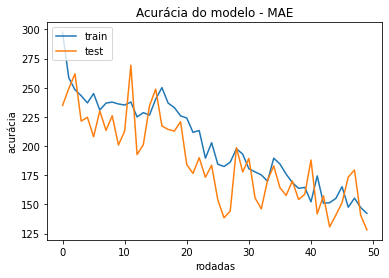

In [ ]:
#gráfico avaliando a acurácia a partir de treino e teste
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('Acurácia do modelo - MAE')
plt.ylabel('acurácia')
plt.xlabel('rodadas')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

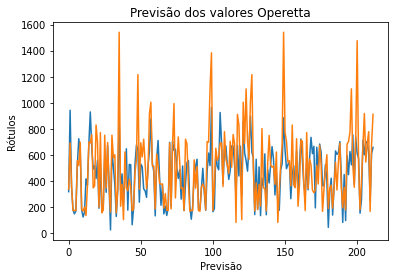

In [ ]:
#avaliando a previsão do modelo com os rótulos
prev = modelo.predict(X_test)
plt.title('Previsão dos valores Operetta')
plt.ylabel('Rótulos')
plt.xlabel('Previsão')
plt.plot(prev)
plt.plot(y_test)
plt.show()

In [ ]:
# Qualit model analisys
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error

In [ ]:
#buscando pelas métricas
print(f"{round(r2_score(y_test, prev) * 100, 2)}% r2_score") #raíz quadrada
print(f"{round(mean_absolute_error(y_test, prev), 2)} Erro médio absoluto") 
print(f"{round(mean_squared_log_error(y_test, prev), 2)} Erro médio quadrático")



51.5% r2_score
133.67 Erro médio absoluto
0.16 Erro médio quadrático


In [ ]:
mean_absolute_error(y_test, prev)

133.67043574351186

In [ ]:
print(f"{round(mean_absolute_error(y_test, prev), 2)}")


133.67


In [ ]:
print(f"{round(mean_squared_log_error(y_test, prev), 2)}")


0.16


In [ ]:
# #salvando o modelo
data = timeProcess()[1]
modelo.save('/content/drive/MyDrive/1_Informações_scripts//model_HUH7_100_75_50_25_'+data+'.h5')

## Predição Regressão

In [ ]:
from PIL import Image


In [ ]:
#chamando o diretório com as imagens
previsao_imagens = "/content/drive/MyDrive/imagens_operetta_huh7"
lista_cell = os.listdir(previsao_imagens)
#lista_cell #lista das imagens

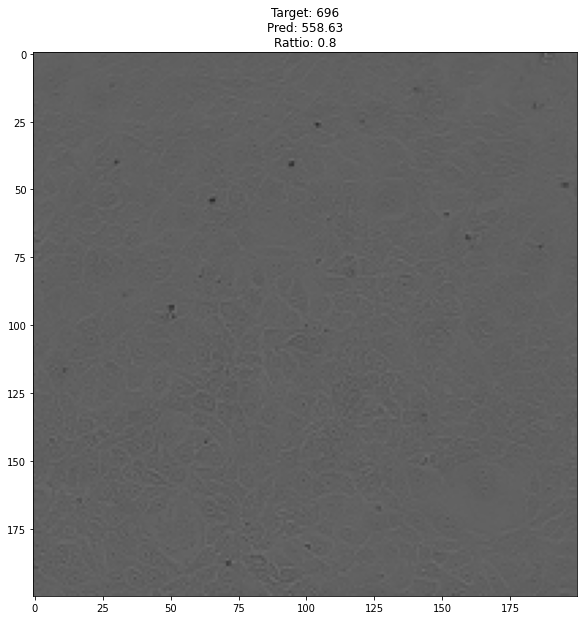

In [ ]:
img_key = 41 #qual a chave a imagem
resize_img = (200,200) #tamanho
image_test = previsao_imagens + '/' + lista_cell[img_key] #da onde essa imagem está vindo

y_classes_base = [n.split('rot')[1] for n in lista_cell] #cortando o nome da image
y_classes_base = [int(n.split('_')[0]) for n in y_classes_base]

#trabalhando com as dimensões e mudando para numpy
img = Image.open(image_test)
img = img.resize(resize_img)
img = np.asarray(img)[:,:,:3]
img_to_prd = np.expand_dims(img, axis=0)


#gerando o gráfico
pred_img = modelo.predict(img_to_prd)[0]
pred_img = round(float(pred_img), 2)
med_img = y_classes_base[img_key]
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.title(f"Target: {med_img}\nPred: {pred_img}\nRattio: {round(pred_img/med_img, 2)}")
plt.show()

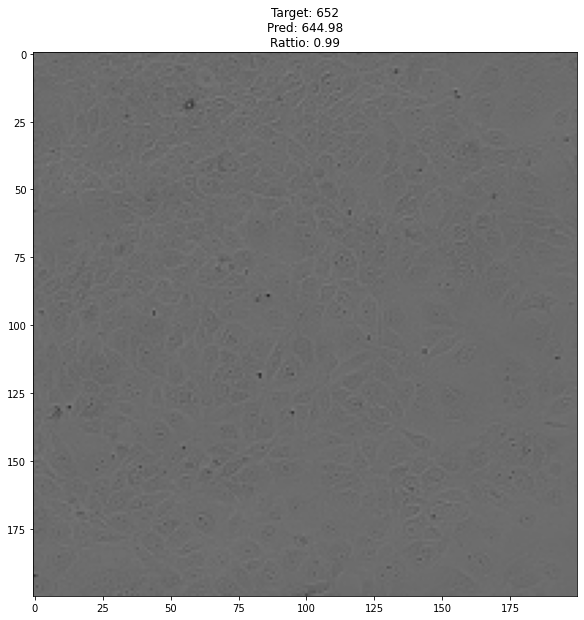

In [ ]:
img_key = 5
resize_img = (200,200)
image_test = previsao_imagens + '/' + lista_cell[img_key]

y_classes_base = [n.split('rot')[1] for n in lista_cell]
y_classes_base = [int(n.split('_')[0]) for n in y_classes_base]

img = Image.open(image_test)
img = img.resize(resize_img)
img = np.asarray(img)[:,:,:3]
img_to_prd = np.expand_dims(img, axis=0)

pred_img = modelo.predict(img_to_prd)[0]
pred_img = round(float(pred_img), 2)
med_img = y_classes_base[img_key]
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.title(f"Target: {med_img}\nPred: {pred_img}\nRattio: {round(pred_img/med_img, 2)}")
plt.show()

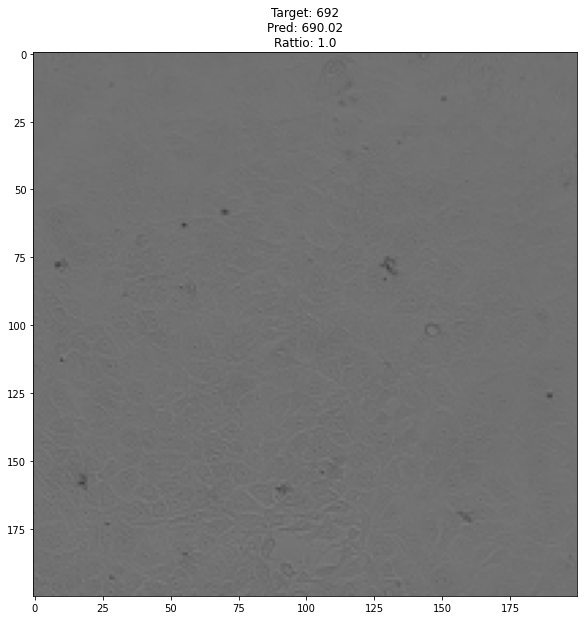

In [ ]:
img_key = 37
resize_img = (200,200)
image_test = previsao_imagens + '/' + lista_cell[img_key]

y_classes_base = [n.split('rot')[1] for n in lista_cell]
y_classes_base = [int(n.split('_')[0]) for n in y_classes_base]

img = Image.open(image_test)
img = img.resize(resize_img)
img = np.asarray(img)[:,:,:3]
img_to_prd = np.expand_dims(img, axis=0)

pred_img = modelo.predict(img_to_prd)[0]
pred_img = round(float(pred_img), 2)
med_img = y_classes_base[img_key]
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.title(f"Target: {med_img}\nPred: {pred_img}\nRattio: {round(pred_img/med_img, 2)}")
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c8daaa9d-6377-4e73-9571-1ae0cf7200fc' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>